In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
import pandas as pd

In [2]:
bus = 73
samples = 20000
nLabel = 2
level = 75

Bra_data = loadtxt('BranchData.dat')
PF_data   = loadtxt(('PF_Profile_%d.csv' %bus), delimiter=',')

branch = Bra_data.shape[0]
index1 = int(0.8*samples)
index2 = int(0.1*samples)
index3 = index1 + index2

idxs = range(index3,samples)



In [3]:
# Verify label between prediction and test data
Label = np.zeros([index2,PF_data.shape[1]])
PF_Percent = PF_data[idxs] / Bra_data[:,5]

# Label each branch as either 1, 2, or 3
Label = (np.abs(PF_Percent) >= level/100 ) * 1# + \
# np.all([(np.abs(PF_Percent) <= 0.95),(np.abs(PF_Percent) > 0.75)], axis = 0) * 2 + \
# (np.abs(PF_Percent) > 0.95) * 3


In [4]:
#Import data for time
GNN_T  = pd.read_excel('Result/Time_GNN.xlsx').to_numpy()
CNN_T  = pd.read_excel('Result/Time_CNN.xlsx').to_numpy()
NN_T   = pd.read_excel('Result/Time_NN.xlsx').to_numpy()
Base_T = pd.read_excel('Result/Time_Baseline.xlsx').to_numpy()

In [5]:
#Find the mean of each type of model
mean_T = np.zeros([3,6])

GNN_M  = np.mean(GNN_T[:,1:-1],axis = 1)
CNN_M  = np.mean(CNN_T[:,1:-1],axis = 1)
NN_M   = np.mean(NN_T[:,1:-1],axis = 1)
Base_M = np.mean(Base_T[:,1])

NN_P   = NN_M/Base_M * 100
CNN_P  = CNN_M/Base_M * 100
GNN_P  = GNN_M/Base_M * 100
Base_P = 100

Text(0.5, 1.0, 'Time to Solve 2000 OPF Samples')

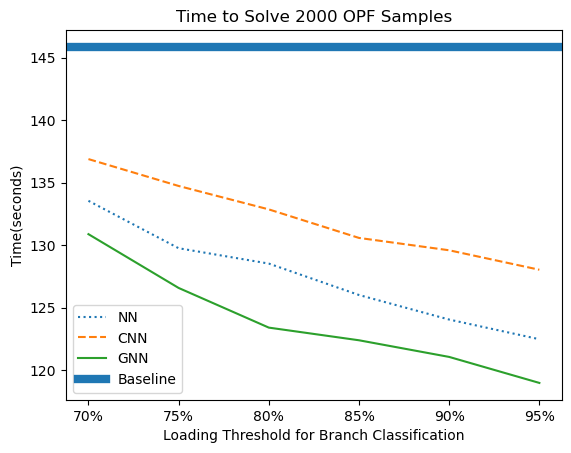

In [7]:
#Plot data for solving time
xname = [ '70%', '75%', '80%', '85%', '90%', '95%' ] 
plt.figure(dpi=100)  
plt.plot(range(70, 100, 5),NN_M, label = "NN"   , linestyle = ':')
plt.plot(range(70, 100, 5),CNN_M, label = "CNN"  , linestyle = '--')
plt.plot(range(70, 100, 5),GNN_M, label = "GNN"  , linestyle = '-')
plt.axhline(y=Base_M, xmin=0, xmax=100, label = "Baseline" , linewidth = 6)
plt.legend()
plt.xlabel('Loading Threshold for Branch Classification')
plt.xticks(ticks=range(70, 100, 5), labels = xname)
plt.ylabel('Time(seconds)')
plt.title("Time to Solve 2000 OPF Samples")
# plt.savefig("Plot/Solving Time For Different Models_{}.png".format(bus))

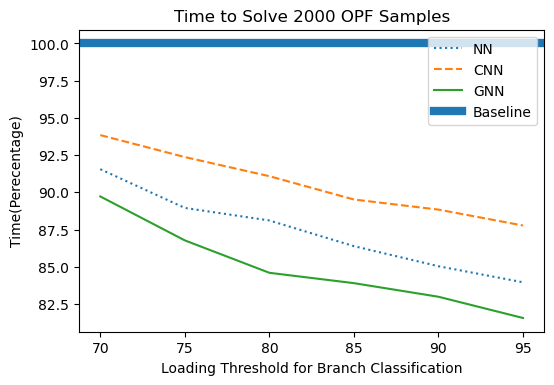

In [7]:
#Plot data for solving time

plt.figure(dpi=100)  
plt.plot(range(70, 100, 5),NN_P, label = "NN"   , linestyle = ':')
plt.plot(range(70, 100, 5),CNN_P, label = "CNN"  , linestyle = '--')
plt.plot(range(70, 100, 5),GNN_P, label = "GNN"  , linestyle = '-')
plt.axhline(y=Base_P, xmin=0, xmax=100, label = "Baseline" , linewidth = 6)
plt.legend()
plt.xlabel('Loading Threshold for Branch Classification')
plt.xticks(ticks=range(70, 100, 5))
plt.ylabel('Time(Perecentage)')
plt.title("Time to Solve 2000 OPF Samples")
plt.savefig("Plot/Solving Time Percentage For Different Models_{}.png".format(bus))

In [8]:
def sample_vio(data, index2, branch):
    temp = np.zeros((index2,branch))
    temp_idx = data.to_numpy()
    temp_idx = temp_idx[:,1:3].astype(int)
    temp[temp_idx[:,0],temp_idx[:,1]] = 1
    lim_vio = np.sum(np.sum(temp, axis = 1) != 0)
    return lim_vio

In [9]:
#Load data for number of branches that violate line limit

bra_vio = np.zeros([3,6])
sam_vio = np.zeros([3,6])
i = 0

for j in range(70, 100, 5): 
    #Compare the result of each model at each level
    NN_data  = pd.read_excel(('Result/Level_NN_%d.xlsx'  %(j)), sheet_name='Percent_Data')
    CNN_data = pd.read_excel(('Result/Level_CNN_%d.xlsx' %(j)), sheet_name='Percent_Data')
    GNN_data = pd.read_excel(('Result/Level_GNN_%d.xlsx' %(j)), sheet_name='Percent_Data')
    
    bra_vio[0,i] = NN_data.shape[0]
    bra_vio[1,i] = CNN_data.shape[0]
    bra_vio[2,i] = GNN_data.shape[0]

    
    sam_vio[0,i] = sample_vio(NN_data,index2, branch)
    sam_vio[1,i] = sample_vio(CNN_data,index2, branch)
    sam_vio[2,i] = sample_vio(GNN_data,index2, branch)
    
    i = i+1

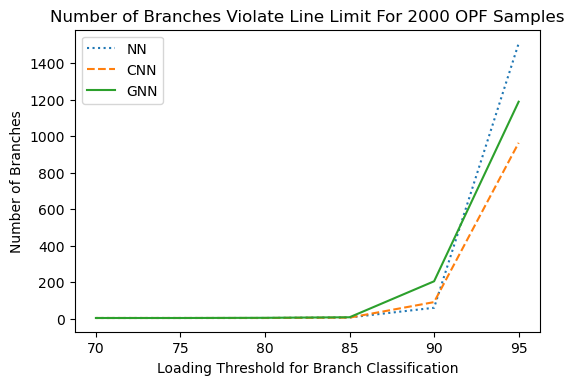

In [10]:
# Plot data for branches violate line limit
plt.figure(dpi=100)  
ax1 = plt.figure()

plt.plot(range(70, 100, 5),bra_vio[0], label = "NN"   , linestyle = ':')
plt.plot(range(70, 100, 5),bra_vio[1], label = "CNN"  , linestyle = '--')
plt.plot(range(70, 100, 5),bra_vio[2], label = "GNN"  , linestyle = '-')
plt.legend()
plt.xlabel('Loading Threshold for Branch Classification')
plt.xticks(ticks=range(70, 100, 5))
plt.ylabel('Number of Branches')
plt.title("Number of Branches Violate Line Limit For 2000 OPF Samples")
plt.savefig("Plot/Branches Violation For Different Models_{}.png".format(bus))

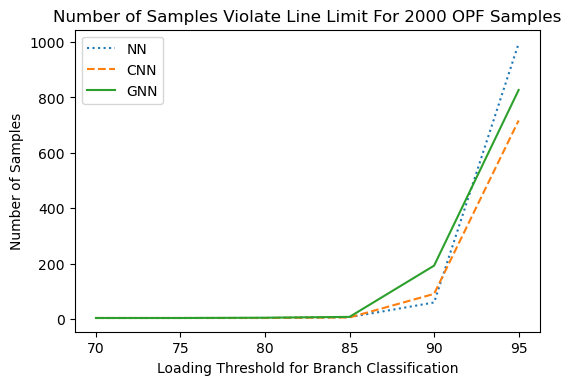

In [11]:
# Plot data for samples violate line limit
plt.figure(dpi=100)  
plt.plot(range(70, 100, 5),sam_vio[0], label = "NN"   , linestyle = ':')
plt.plot(range(70, 100, 5),sam_vio[1], label = "CNN"  , linestyle = '--')
plt.plot(range(70, 100, 5),sam_vio[2], label = "GNN"  , linestyle = '-')
plt.legend()
plt.xlabel('Loading Threshold for Branch Classification')
plt.xticks(ticks=range(70, 100, 5))
plt.ylabel('Number of Samples')
plt.title("Number of Samples Violate Line Limit For 2000 OPF Samples")
plt.savefig("Plot/Samples Violation For Different Models_{}.png".format(bus))

In [12]:
#Check the number of constraints per loading level
const = np.zeros([3,6])
i = 0

for j in range(70, 100, 5): 
    #Compare the result of each model at each level
    level = j
    NN_data  = loadtxt(('Result/NN_%d_PF_Predict_%d.csv' %(level, bus)), delimiter=',')
    CNN_data = loadtxt(('Result/CNN_%d_PF_Predict_%d.csv' %(level, bus)), delimiter=',')
    GNN_data = loadtxt(('Result/GNN_%d_PF_Predict_%d.csv' %(level, bus)), delimiter=',')
    
    const[0,i] = np.mean(np.sum(NN_data == 2, axis = 1))
    const[1,i] = np.mean(np.sum(CNN_data == 2, axis = 1))
    const[2,i] = np.mean(np.sum(GNN_data == 2, axis = 1))
    i = i+1

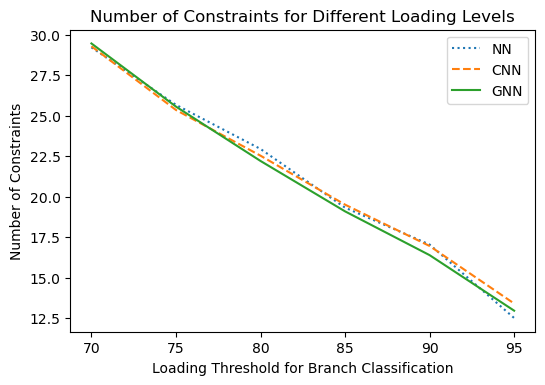

In [13]:
plt.figure(dpi=100)  
plt.plot(range(70, 100, 5),const[0], label = "NN"   , linestyle = ':')
plt.plot(range(70, 100, 5),const[1], label = "CNN"  , linestyle = '--')
plt.plot(range(70, 100, 5),const[2], label = "GNN"  , linestyle = '-')
plt.legend()
plt.xlabel('Loading Threshold for Branch Classification')
plt.xticks(ticks=range(70, 100, 5))
plt.ylabel('Number of Constraints')
plt.title("Number of Constraints for Different Loading Levels")
plt.savefig("Plot/Number of Constraint For Different Models_{}.png".format(bus))

In [14]:
result = np.zeros([3,6])
i = 0

for j in range(70, 100, 5):
    # Label each branch as either 1, 2, or 3
    Label = (np.abs(PF_Percent) >= j/100 ) * 1
    
    #Compare the result of each model at each level
    NN_data  = loadtxt(('Result/NN_%d_PF_Predict_%d.csv' %(j, bus)), delimiter=',')
    CNN_data = loadtxt(('Result/CNN_%d_PF_Predict_%d.csv' %(j, bus)), delimiter=',')
    GNN_data = loadtxt(('Result/GNN_%d_PF_Predict_%d.csv' %(j, bus)), delimiter=',')
    
    result[0,i] = index2 * branch - np.sum(Label+1 == NN_data)
    result[1,i] = index2 * branch - np.sum(Label+1 == CNN_data)
    result[2,i] = index2 * branch - np.sum(Label+1 == GNN_data)
    i = i+1

In [15]:
#Organize data into tables
ER = result/(index2*branch) * 100
ES = result

NN_Stat  = np.stack((NN_M,  NN_P,  bra_vio[0], const[0], ER[0], ES[0]),axis = 1)
CNN_Stat = np.stack((CNN_M, CNN_P, bra_vio[1], const[1], ER[1], ES[1]),axis = 1)
GNN_Stat = np.stack((GNN_M, GNN_P, bra_vio[2], const[2], ER[2], ES[2]),axis = 1)

In [16]:
#Load data into panda and write to excel

df_NN = pd.DataFrame(NN_Stat,   index=range(70, 100, 5), columns=['Time (seconds)', 'Time (Percentage)', '# of Over Limit Lines', '# Constraints', 'Error Rate', 'Error Sample'])

df_CNN = pd.DataFrame(CNN_Stat, index=range(70, 100, 5), columns=['Time (seconds)', 'Time (Percentage)', '# of Over Limit Lines', '# Constraints', 'Error Rate', 'Error Sample'])

df_GNN = pd.DataFrame(GNN_Stat, index=range(70, 100, 5), columns=['Time (seconds)', 'Time (Percentage)', '# of Over Limit Lines', '# Constraints', 'Error Rate', 'Error Sample'])

print(df_GNN)

with pd.ExcelWriter('Result/Stat_Comparison.xlsx') as writer:
    df_NN.to_excel(writer, sheet_name='NN')
    df_CNN.to_excel(writer, sheet_name='CNN')
    df_GNN.to_excel(writer, sheet_name='GNN')

    Time (seconds)  Time (Percentage)  # of Over Limit Lines  # Constraints  \
70      130.875973          89.723358                    4.0        29.4495   
75      126.570246          86.771524                    4.0        25.5510   
80      123.394759          84.594536                    5.0        22.1960   
85      122.381306          83.899753                    8.0        19.0845   
90      121.048232          82.985850                  205.0        16.3820   
95      118.967101          81.559110                 1188.0        12.9540   

    Error Rate  Error Sample  
70    1.468056        3171.0  
75    2.226389        4809.0  
80    1.851389        3999.0  
85    2.257407        4876.0  
90    2.325463        5023.0  
95    2.709259        5852.0  


In [17]:
sam_vio

array([[  4.,   4.,   4.,   7.,  60., 995.],
       [  4.,   4.,   4.,   6.,  91., 717.],
       [  4.,   4.,   5.,   8., 193., 827.]])